In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import fancyimpute
#from fancyimpute import MICE 

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn import metrics
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import plotly.plotly as py
import plotly.graph_objs as go

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import graphviz
import xgboost as xgb

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegressionCV

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


py.plotly.tools.set_credentials_file(username='popo95', api_key='UV0tMEa0DGHmbljqHBZz')

import itertools

#import rpy2.robjects as robjects
#from rpy2.robjects import pandas2ri

%matplotlib inline

/home/stephane/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



# 1. Exploratory analysis

In [2]:
data_train = pd.read_csv('/home/stephane/Telecom/P1/SD701_BigDataMining/TP3_Kaggle/data_forest/train-set.csv', \
                       encoding = 'latin-1', sep=',', decimal='.')
data_test = pd.read_csv('/home/stephane/Telecom/P1/SD701_BigDataMining/TP3_Kaggle/data_forest/test-set.csv', \
                       encoding = 'latin-1', sep=',', decimal='.')
data_train.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2611,326,20,120,27,1597,168,214,184,...,0,0,0,0,0,0,0,0,0,6
1,2,2772,324,17,42,7,1814,175,220,183,...,0,0,0,0,0,0,0,0,0,2
2,3,2764,4,14,480,-21,700,201,212,148,...,0,0,0,0,0,0,0,0,0,2
3,4,3032,342,9,60,8,4050,202,227,164,...,0,0,0,0,0,0,0,0,0,2
4,5,2488,23,11,117,21,1117,209,218,151,...,0,0,0,0,0,0,0,0,0,2
5,6,2968,83,8,390,19,4253,232,226,127,...,0,0,0,0,0,0,0,0,0,2
6,7,3027,11,6,534,47,1248,214,228,151,...,0,0,0,0,0,0,0,0,0,2
7,8,3216,277,9,67,23,5430,212,236,169,...,0,0,0,0,0,0,0,0,0,1
8,9,3242,262,5,849,169,1672,207,242,173,...,0,0,0,0,0,0,0,0,0,1
9,10,3315,61,15,120,-6,3042,231,208,106,...,0,0,0,0,0,0,1,0,0,7


In [3]:
data_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.0000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,...,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,264360.5000,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.555615,...,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118,2.052294
std,152628.4615,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.336178,...,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021,1.396863
min,1.0000,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,132180.7500,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,264360.5000,2996.000000,127.000000,13.000000,223.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,396540.2500,3163.000000,260.000000,18.000000,387.000000,69.000000,3333.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,528720.0000,3957.000000,440.000000,65.000000,1397.000000,601.000000,7577.000000,268.000000,266.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 56 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Wilderness_Area1                      528720 non-null int64
Wilderness_Area2                      528720 non-null int64
Wilderness_Area3                      528720 non-null int64
Wilderness_Area4                      528720 non-

There are 12 explanatory variables and 1 explained variable (Cover_Type). We aim to predict the latter.

For the explanatory variables, we have 10 quantitative variables, and 2 categorical variables (4 different classes for 'Wilderness_Area', and 40 different classes for 'Soil_Type').

We group categorical variables for visualization purpose :

In [5]:
data_train0 = data_train.copy()
data_train0['Soil_Type'] = \
                data_train['Soil_Type1']*1 + data_train['Soil_Type2']*2 + data_train['Soil_Type3']*3 + \
                data_train['Soil_Type4']*4 + data_train['Soil_Type5']*5 + data_train['Soil_Type6']*6 + \
                data_train['Soil_Type7']*7 + data_train['Soil_Type8']*8 + data_train['Soil_Type9']*9 + \
                data_train['Soil_Type10']*10 + data_train['Soil_Type11']*11 + data_train['Soil_Type12']*12 + \
                data_train['Soil_Type13']*13 + data_train['Soil_Type14']*14 + data_train['Soil_Type15']*15 + \
                data_train['Soil_Type16']*16 + data_train['Soil_Type17']*17 + data_train['Soil_Type18']*18 + \
                data_train['Soil_Type19']*19 + data_train['Soil_Type20']*20 + data_train['Soil_Type21']*21 + \
                data_train['Soil_Type22']*22 + data_train['Soil_Type23']*23 + data_train['Soil_Type24']*24 + \
                data_train['Soil_Type25']*25 + data_train['Soil_Type26']*26 + data_train['Soil_Type27']*27 + \
                data_train['Soil_Type28']*28 + data_train['Soil_Type29']*29 + data_train['Soil_Type30']*30 + \
                data_train['Soil_Type31']*31 + data_train['Soil_Type32']*32 + data_train['Soil_Type33']*33 + \
                data_train['Soil_Type34']*34 + data_train['Soil_Type35']*35 + data_train['Soil_Type36']*36 + \
                data_train['Soil_Type37']*37 + data_train['Soil_Type38']*38 + data_train['Soil_Type39']*39 + \
                data_train['Soil_Type40']*40            

data_train0['Wilderness_Area'] = data_train['Wilderness_Area1']*1 + data_train['Wilderness_Area2']*2 + \
                                data_train['Wilderness_Area3']*3 + data_train['Wilderness_Area4']*4 

data_train2 = data_train0.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', \
                                'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', \
                                'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', \
                                'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', \
                                'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', \
                                'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', \
                                'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', \
                                'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', \
                                'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])


data_train2['Soil_Type'] = data_train2['Soil_Type'].astype('category')
data_train2['Wilderness_Area'] = data_train2['Wilderness_Area'].astype('category')
data_train2['Cover_Type'] = data_train2['Cover_Type'].astype('category')

data_train2 = data_train2[['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', \
                          'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',\
                          'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', \
                          'Wilderness_Area', 'Soil_Type', 'Cover_Type']]

data_train4 = data_train['Cover_Type']
data_train5 = data_train.drop(columns=['Cover_Type'])


############################################################################################################
############################################################################################################
################################# => A SUPPRIMER <= ########################################################
############################################################################################################
############################################################################################################

################## Meme chose pour le set de test ################## 

data_test['Soil_Type'] = \
                data_test['Soil_Type1']*1 + data_test['Soil_Type2']*2 + data_test['Soil_Type3']*3 + \
                data_test['Soil_Type4']*4 + data_test['Soil_Type5']*5 + data_test['Soil_Type6']*6 + \
                data_test['Soil_Type7']*7 + data_test['Soil_Type8']*8 + data_test['Soil_Type9']*9 + \
                data_test['Soil_Type10']*10 + data_test['Soil_Type11']*11 + data_test['Soil_Type12']*12 + \
                data_test['Soil_Type13']*13 + data_test['Soil_Type14']*14 + data_test['Soil_Type15']*15 + \
                data_test['Soil_Type16']*16 + data_test['Soil_Type17']*17 + data_test['Soil_Type18']*18 + \
                data_test['Soil_Type19']*19 + data_test['Soil_Type20']*20 + data_test['Soil_Type21']*21 + \
                data_test['Soil_Type22']*22 + data_test['Soil_Type23']*23 + data_test['Soil_Type24']*24 + \
                data_test['Soil_Type25']*25 + data_test['Soil_Type26']*26 + data_test['Soil_Type27']*27 + \
                data_test['Soil_Type28']*28 + data_test['Soil_Type29']*29 + data_test['Soil_Type30']*30 + \
                data_test['Soil_Type31']*31 + data_test['Soil_Type32']*32 + data_test['Soil_Type33']*33 + \
                data_test['Soil_Type34']*34 + data_test['Soil_Type35']*35 + data_test['Soil_Type36']*36 + \
                data_test['Soil_Type37']*37 + data_test['Soil_Type38']*38 + data_test['Soil_Type39']*39 + \
                data_test['Soil_Type40']*40            

data_test['Wilderness_Area'] = data_test['Wilderness_Area1']*1 + data_test['Wilderness_Area2']*2 + \
                                data_test['Wilderness_Area3']*3 + data_test['Wilderness_Area4']*4 

data_test2 = data_test.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', \
                                'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', \
                                'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', \
                                'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', \
                                'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', \
                                'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', \
                                'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', \
                                'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', \
                                'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])


data_test2['Soil_Type'] = data_test2['Soil_Type'].astype('category')
data_test2['Wilderness_Area'] = data_test2['Wilderness_Area'].astype('category')

data_test2 = data_test2[['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', \
                          'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',\
                          'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', \
                          'Wilderness_Area', 'Soil_Type']]

data_train2.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,1,2611,326,20,120,27,1597,168,214,184,2913,3,10,6
1,2,2772,324,17,42,7,1814,175,220,183,2879,1,23,2
2,3,2764,4,14,480,-21,700,201,212,148,700,3,11,2
3,4,3032,342,9,60,8,4050,202,227,164,2376,1,23,2
4,5,2488,23,11,117,21,1117,209,218,151,1136,4,6,2


In [6]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 14 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Wilderness_Area                       528720 non-null category
Soil_Type                             528720 non-null category
Cover_Type                            528720 non-null category
dtypes: category(3), int64(11)
memory us

we set 'Id' as an index :

In [7]:
data_train2.set_index('Id', inplace=True)
data_test2.set_index('Id', inplace=True)


Then we build the graph of the pairwise correlation between attributes :

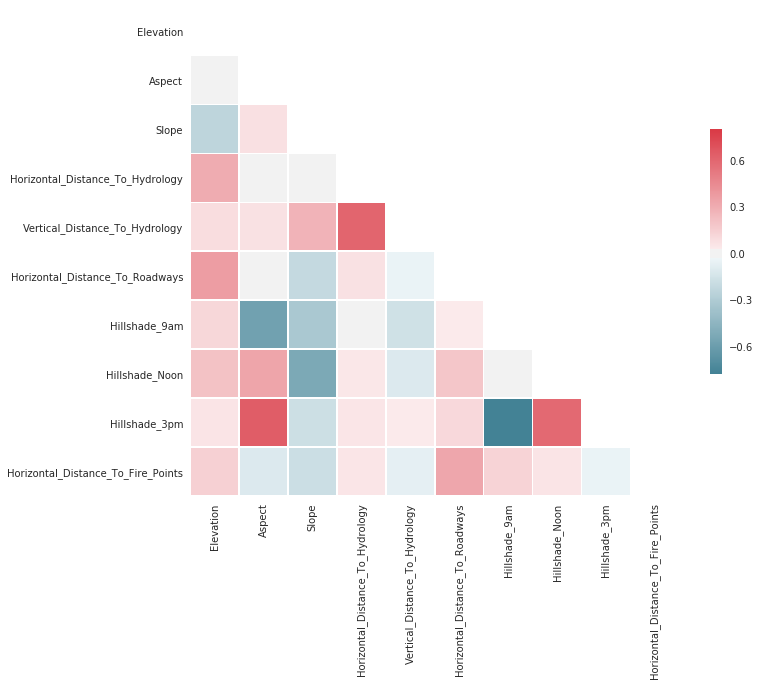

In [8]:

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data_train2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_train2.corr(), mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can observe correlations between variables of the same category (i.e 'Hillshade_9am' strongly negatively correlated with 'Hillshade_3pm', or positive correlation between 'Vertical_Distance_to_Hydrology' and 'Horizontal_Distance_to_Hydrology').

We can also observe strong correlations between the variables 'Aspect' and 'Hillshade', and to a lesser extent between 'Slope' and 'Hillshade'

In [9]:
# Normalization of data 
data_train_norm = (data_train2.iloc[:,0:10] - data_train2.iloc[:,0:10].mean())/ data_train2.iloc[:,0:10].var()
data_test_norm = (data_test2.iloc[:,0:10] - data_test2.iloc[:,0:10].mean())/ data_test2.iloc[:,0:10].var()

# set 'data_train3' and  'data_test3' data sets
data_train3 = data_train_norm[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', \
                          'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',\
                          'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
data_train3[['Wilderness_Area']] = data_train2[['Wilderness_Area']]
data_train3[['Soil_Type']] = data_train2[['Soil_Type']]
data_train3[['Cover_Type']] = data_train2[['Cover_Type']]

data_test3 = data_test_norm[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', \
                          'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',\
                          'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]


In [10]:
#data_test3[['Wilderness_Area']] = data_test2[['Wilderness_Area']]
#data_test3[['Soil_Type']] = data_test2[['Soil_Type']]

#data_train3.head(5)

For the quantitative variables, let's draw the boxplots and violinplots of each variables for each class :

/home/stephane/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



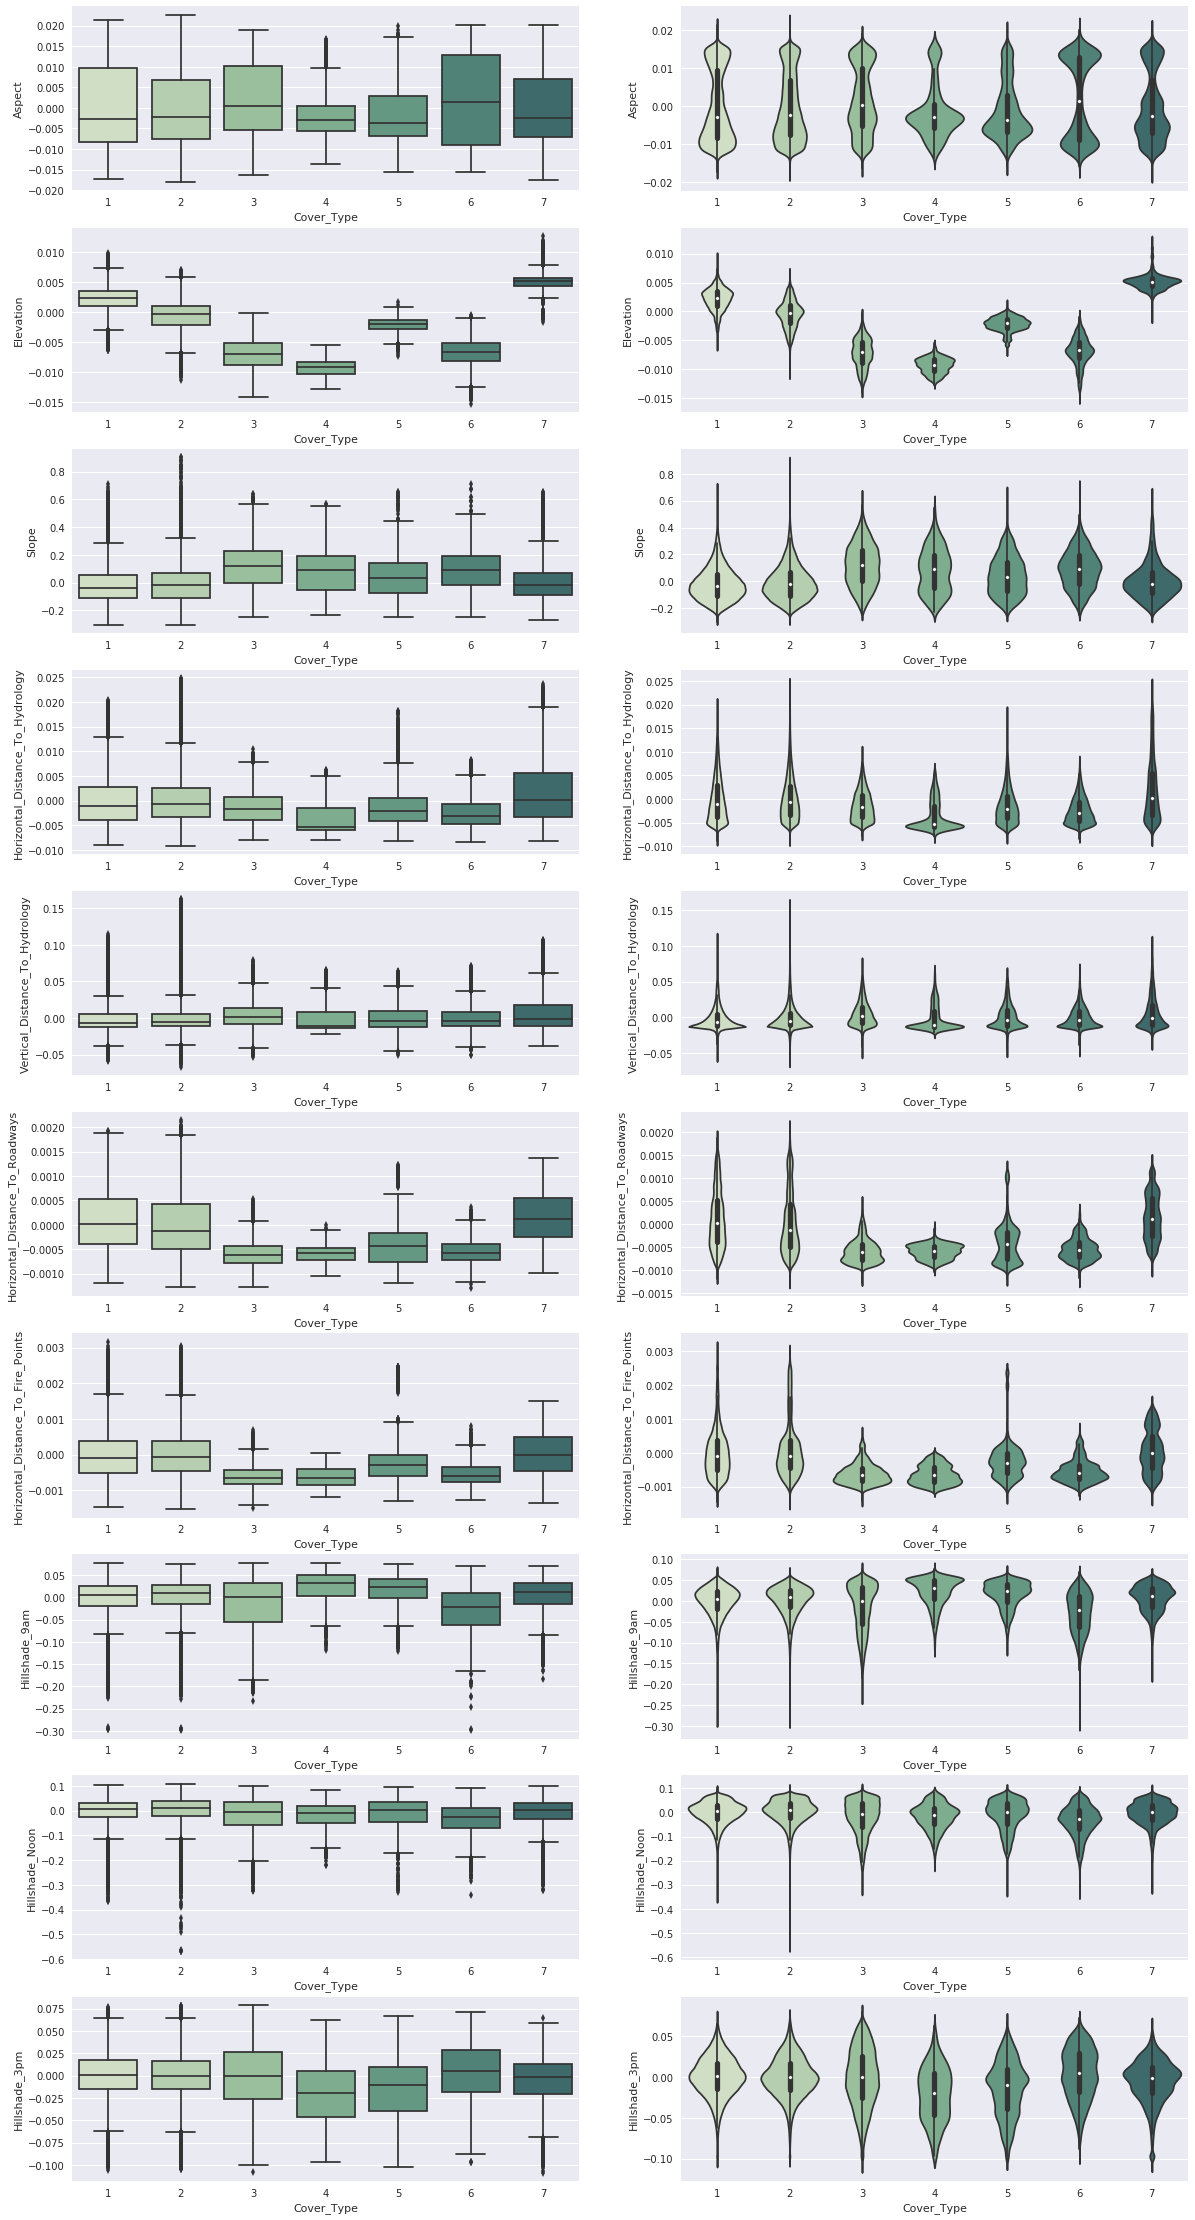

In [12]:
sns.set(rc={'figure.figsize':(20,40)})
p=8
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

######################################
plt.subplot(10,2,1)
sns.boxplot(x='Cover_Type', y='Aspect',\
               data=data_train3[['Aspect', 'Cover_Type']]\
               .sort_values('Aspect'), palette=pal)
plt.subplot(10,2,2)
sns.violinplot(x='Cover_Type', y='Aspect',\
               data=data_train3[['Aspect', 'Cover_Type']]\
               .sort_values('Aspect'), palette=pal)

######################################
plt.subplot(10,2,3)
sns.boxplot(x='Cover_Type', y='Elevation',\
               data=data_train3[['Elevation', 'Cover_Type']]\
               .sort_values('Elevation'), palette=pal)
plt.subplot(10,2,4)
sns.violinplot(x='Cover_Type', y='Elevation',\
               data=data_train3[['Elevation', 'Cover_Type']]\
               .sort_values('Elevation'), palette=pal)

######################################
plt.subplot(10,2,5)
sns.boxplot(x='Cover_Type', y='Slope',\
               data=data_train3[['Slope', 'Cover_Type']]\
               .sort_values('Slope'), palette=pal)
plt.subplot(10,2,6)
sns.violinplot(x='Cover_Type', y='Slope',\
               data=data_train3[['Slope', 'Cover_Type']]\
               .sort_values('Slope'), palette=pal)

######################################
plt.subplot(10,2,7)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology',\
               data=data_train3[['Horizontal_Distance_To_Hydrology', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Hydrology'), palette=pal)
plt.subplot(10,2,8)
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology',\
               data=data_train3[['Horizontal_Distance_To_Hydrology', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Hydrology'), palette=pal)

######################################
plt.subplot(10,2,9)
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology',\
               data=data_train3[['Vertical_Distance_To_Hydrology', 'Cover_Type']]\
               .sort_values('Vertical_Distance_To_Hydrology'), palette=pal)
plt.subplot(10,2,10)
sns.violinplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology',\
               data=data_train3[['Vertical_Distance_To_Hydrology', 'Cover_Type']]\
               .sort_values('Vertical_Distance_To_Hydrology'), palette=pal)

######################################
plt.subplot(10,2,11)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways',\
               data=data_train3[['Horizontal_Distance_To_Roadways', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Roadways'), palette=pal)
plt.subplot(10,2,12)
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways',\
               data=data_train3[['Horizontal_Distance_To_Roadways', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Roadways'), palette=pal)

######################################
plt.subplot(10,2,13)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points',\
               data=data_train3[['Horizontal_Distance_To_Fire_Points', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Fire_Points'), palette=pal)
plt.subplot(10,2,14)
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points',\
               data=data_train3[['Horizontal_Distance_To_Fire_Points', 'Cover_Type']]\
               .sort_values('Horizontal_Distance_To_Fire_Points'), palette=pal)

######################################
plt.subplot(10,2,15)
sns.boxplot(x='Cover_Type', y='Hillshade_9am',\
               data=data_train3[['Hillshade_9am', 'Cover_Type']]\
               .sort_values('Hillshade_9am'), palette=pal)
plt.subplot(10,2,16)
sns.violinplot(x='Cover_Type', y='Hillshade_9am',\
               data=data_train3[['Hillshade_9am', 'Cover_Type']]\
               .sort_values('Hillshade_9am'), palette=pal)

######################################
plt.subplot(10,2,17)
sns.boxplot(x='Cover_Type', y='Hillshade_Noon',\
               data=data_train3[['Hillshade_Noon', 'Cover_Type']]\
               .sort_values('Hillshade_Noon'), palette=pal)
plt.subplot(10,2,18)
sns.violinplot(x='Cover_Type', y='Hillshade_Noon',\
               data=data_train3[['Hillshade_Noon', 'Cover_Type']]\
               .sort_values('Hillshade_Noon'), palette=pal)

######################################
plt.subplot(10,2,19)
sns.boxplot(x='Cover_Type', y='Hillshade_3pm',\
               data=data_train3[['Hillshade_3pm', 'Cover_Type']]\
               .sort_values('Hillshade_3pm'), palette=pal)
plt.subplot(10,2,20)
sns.violinplot(x='Cover_Type', y='Hillshade_3pm',\
               data=data_train3[['Hillshade_3pm', 'Cover_Type']]\
               .sort_values('Hillshade_3pm'), palette=pal)

######################################

#plt.show

We can observe a clear relation between the value of the variable 'Elevation' and the Cover_Type class it belongs. The explanatory power of this variable for the explained variable should be significant.

We can also observe a similar combination of variables (similar patterns in boxplots and distribuions) for Cover_Type 1, 2 and 7 on one hand, and 3, 4, 5, 6 on the other hand.

Now, let's visualize the qualitative variables. 

Firsrt, let's draw the stacked bar chart with the cumulation of each Soil_Type for each Cover Type class :

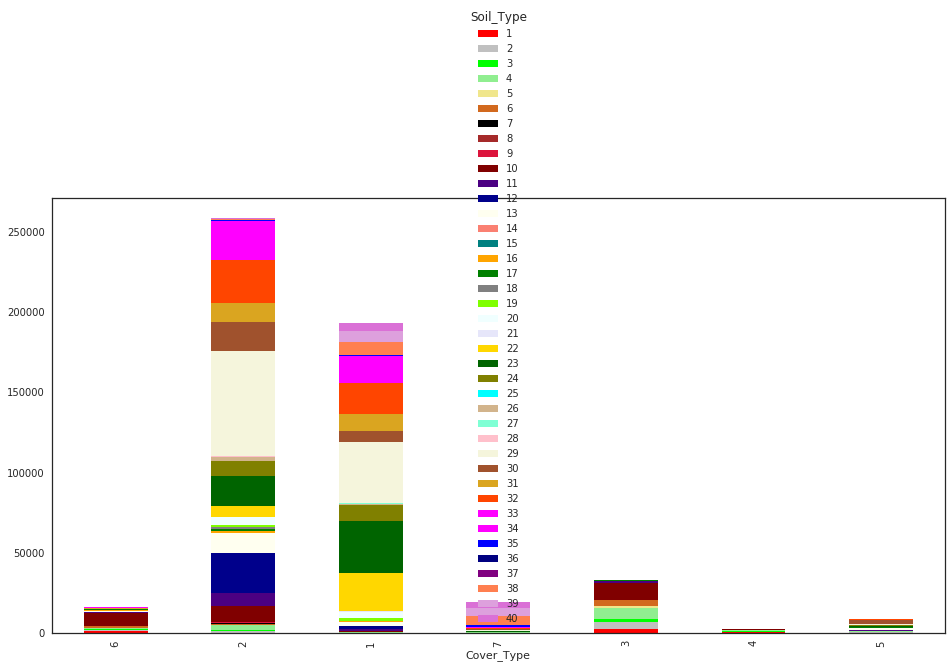

In [11]:
Soil_Type_table0 = pd.crosstab(index=data_train3['Cover_Type'], columns=data_train3['Soil_Type'])
Soil_Type_table0.plot(kind="bar", figsize=(16,8), stacked=True, color =\
{'teal', 'tan', 'silver', 'sienna', 'salmon', 'red','purple', 'plum', 'pink', 'orchid', 'orangered', \
  'orange', 'olive', 'navy', 'maroon', 'magenta','lime',   'lightgreen','lavender', 'khaki', 'ivory', \
  'indigo', 'grey', 'green', 'goldenrod', 'gold', 'fuchsia', 'darkgreen', 'darkblue', 'cyan', 'crimson',\
  'coral', 'chocolate', 'chartreuse', 'brown', 'blue', 'black', 'beige', 'azure', 'aquamarine'})

  

In [12]:
Soil_Type_table = pd.crosstab(index=data_train3['Soil_Type'], 
                          columns=data_train3['Cover_Type'])
Soil_Type_table.head(10)

Cover_Type,1,2,3,4,5,6,7
Soil_Type,,,,,,,
10,894,9776,10485,220,241,7954,0
23,32223,19053,0,0,658,23,637
11,678,8265,1256,35,612,461,0
6,0,821,3665,302,0,1207,0
12,2381,24869,0,0,0,0,0
29,37986,65069,0,0,1057,0,719
22,23536,6801,0,0,0,0,124
24,10286,8945,0,0,65,133,188
38,7961,671,0,0,0,0,5599


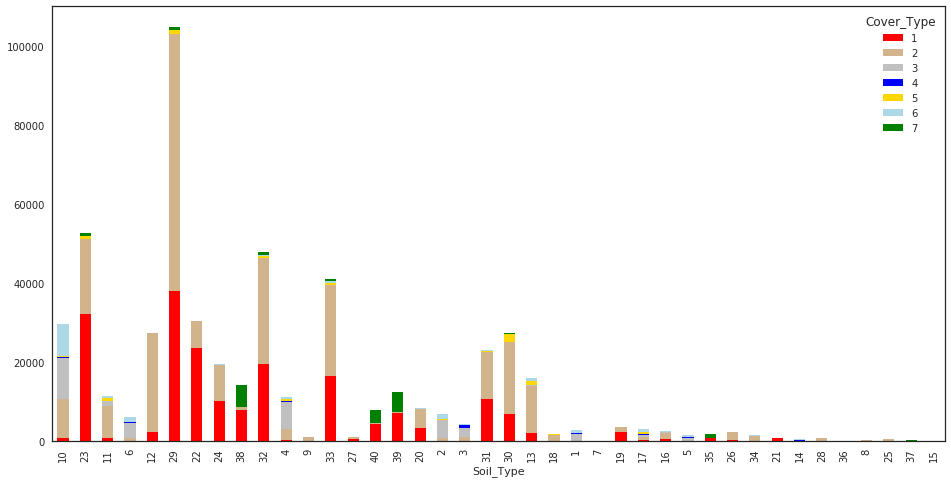

In [13]:
Soil_Type_table.plot(kind="bar", figsize=(16,8), stacked=True, color = {'r','g','b','gold','tan','lightblue','silver'})

Then, let's plot 'Wilderness_Area' vs 'Cover_Type' :

In [14]:
Wilderness_Area_table2 = pd.crosstab(columns=data_train3['Wilderness_Area'], index=data_train3['Cover_Type'])
Wilderness_Area_table2

Wilderness_Area,1,2,3,4
Cover_Type,,,,
6,0,0,6950,8737
2,133290,8246,113737,2716
1,95876,16841,79794,0
7,4643,2169,11944,0
3,0,0,13034,19564
4,0,0,0,2503
5,3478,0,5198,0


Cover_Type,1,2,3,4,5,6,7
Wilderness_Area,,,,,,,
3,79794,113737,13034,0,5198,6950,11944
1,95876,133290,0,0,3478,0,4643
4,0,2716,19564,2503,0,8737,0
2,16841,8246,0,0,0,0,2169


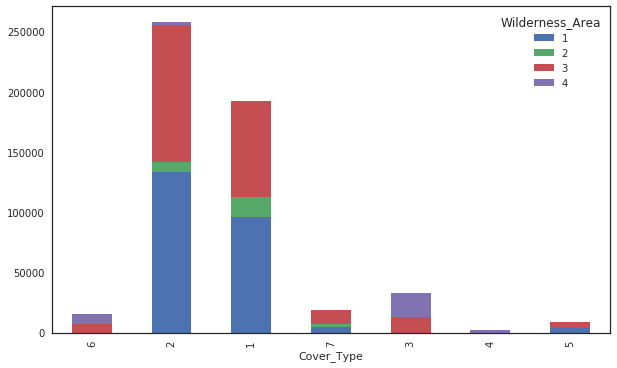

In [15]:
Wilderness_Area_table2.plot(kind="bar", figsize=(10,6), stacked=True)
Wilderness_Area_table = pd.crosstab(index=data_train3['Wilderness_Area'], columns=data_train3['Cover_Type'])
Wilderness_Area_table

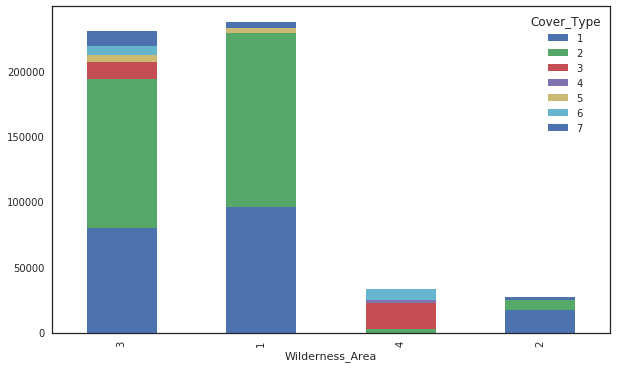

In [16]:
Wilderness_Area_table.plot(kind="bar", figsize=(10,6), stacked=True)

Finally, let's drawn the distribution of each normalized variable :

/home/stephane/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/stephane/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/stephane/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/stephane/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



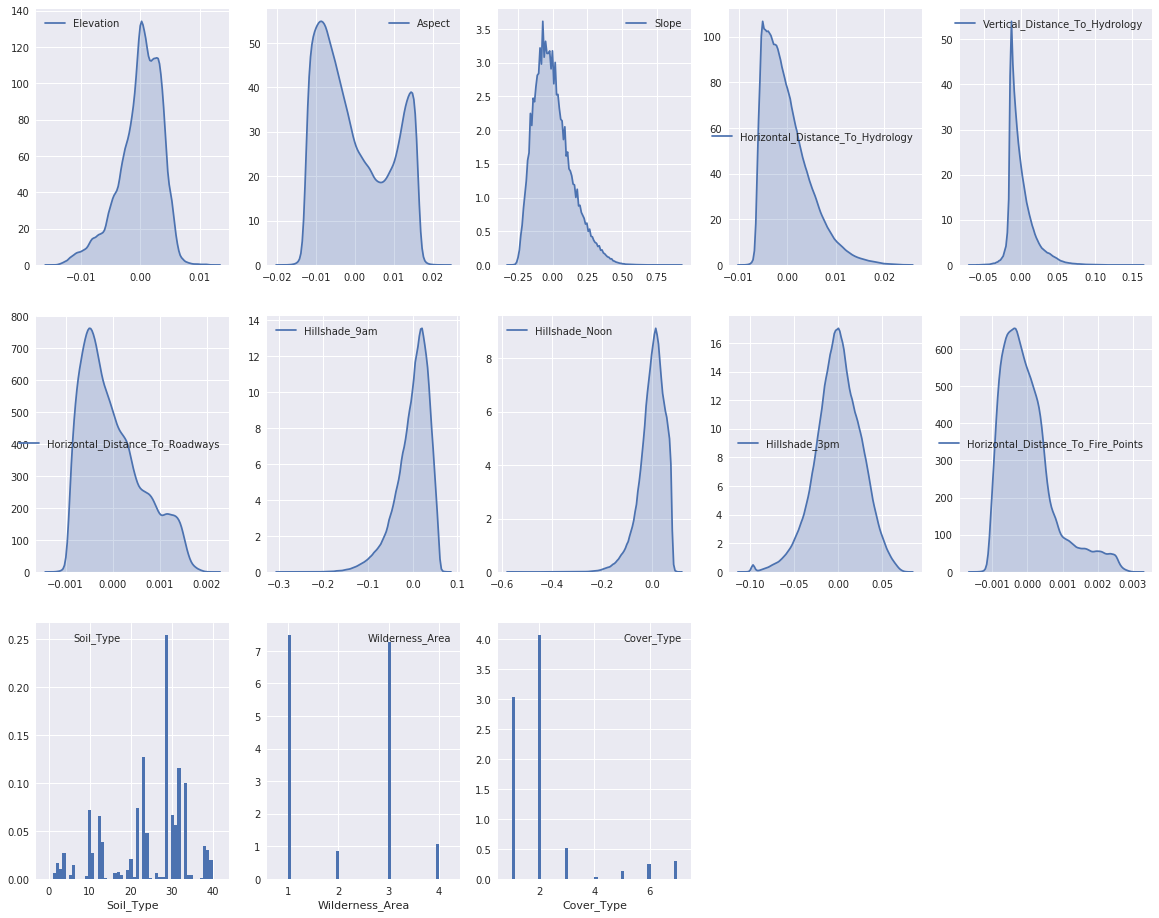

In [17]:
sns.set(rc={'figure.figsize':(20,16)})
plt.subplot(3,5,1)
sns.kdeplot(data_train3.loc[:,'Elevation'], legend=True, shade=True)
plt.subplot(3,5,2)
sns.kdeplot(data_train3.loc[:,'Aspect'], legend=True, shade=True)
plt.subplot(3,5,3)
sns.kdeplot(data_train3.loc[:,'Slope'], legend=True, shade=True)
plt.subplot(3,5,4)
sns.kdeplot(data_train3.loc[:,'Horizontal_Distance_To_Hydrology'], legend=True, shade=True)
plt.subplot(3,5,5)
sns.kdeplot(data_train3.loc[:,'Vertical_Distance_To_Hydrology'], legend=True, shade=True)
plt.subplot(3,5,6)
sns.kdeplot(data_train3.loc[:,'Horizontal_Distance_To_Roadways'], legend=True, shade=True)
plt.subplot(3,5,7)
sns.kdeplot(data_train3.loc[:,'Hillshade_9am'], legend=True, shade=True)
plt.subplot(3,5,8)
sns.kdeplot(data_train3.loc[:,'Hillshade_Noon'], legend=True, shade=True)
plt.subplot(3,5,9)
sns.kdeplot(data_train3.loc[:,'Hillshade_3pm'], legend=True, shade=True)
plt.subplot(3,5,10)
sns.kdeplot(data_train3.loc[:,'Horizontal_Distance_To_Fire_Points'], legend=True, shade=True)
plt.subplot(3,5,11)
sns.distplot(data_train3.loc[:,'Soil_Type'],kde_kws={"color": "None", "lw": 1, "label": \
                                        "Soil_Type"}, hist_kws={"linewidth": 1,"alpha": 1})
plt.subplot(3,5,12)
sns.distplot(data_train3.loc[:,'Wilderness_Area'], kde_kws={"color": "None", "lw": 1, "label":\
                                        "Wilderness_Area"}, hist_kws={"linewidth": 1,"alpha": 1})
plt.subplot(3,5,13)
sns.distplot(data_train3.loc[:,'Cover_Type'], kde_kws={"color": "None", "lw": 1, "label": \
                                        "Cover_Type"}, hist_kws={"linewidth": 1,"alpha": 1})

# 2. Prediction models

## Decision Tree

Non-parametric approach useful for quantitative and qualitative features. 

Appropriate if classes are imbalanced, this algorithm search for parcimony of the features.

Separate the target variable and rest of the variables using .iloc to subset the data

In [19]:
X, y = data_train.iloc[:,:-1],data_train.iloc[:,-1]
X_train1, X_validation, y_train1, y_validation = train_test_split(X, y, test_size=0.2, random_state=123)

Let's run a simple decision tree model :

In [12]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train1, y_train1)

In [13]:
y_pred_DT = clf.predict(X_validation)

rmse_DT = np.sqrt(mean_squared_error(y_validation, y_pred_DT))
print("RMSE: %f" % (rmse_DT))

RMSE: 0.712456


Predictions are good

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph

## Random Forest

the Random Forest algorithm randomly selects observations and features to build several decision trees and then averages the results.

grid search for random forest :

In [15]:
grid_RFR = {"max_features"      : np.linspace(0.3,0.8,6)}
RF=RandomForesClassifier(n_estimators=100)
grid_search_RFR = GridSearchCV(RF, grid_RFR, n_jobs=-1, cv=3)
grid_search_RFR.fit(X_train1, y_train1)
'''RandomForestClassifier(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)'''

"RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,\n           max_features=0.6, max_leaf_nodes=None,\n           min_impurity_decrease=0.0, min_impurity_split=None,\n           min_samples_leaf=50, min_samples_split=2,\n           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,\n           oob_score=False, random_state=None, verbose=0, warm_start=False)"

Run the best model found with grid search :

In [55]:
best_model_Classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=0.6, min_samples_leaf = 50)

In [56]:
best_model_Classifier.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

and make prediction :

In [57]:
y_pred_RF = best_model_Classifier.predict(X_validation)

rmse_RF = np.sqrt(mean_squared_error(y_validation, y_pred_RF))
print("RMSE: %f" % (rmse_RF))

RMSE: 0.806011


We've slightly improved the quality of our predictions

Features importance :

Feature ranking:
1. feature Elevation (0.362630)
2. feature Horizontal_Distance_To_Fire_Points (0.110486)
3. feature Horizontal_Distance_To_Roadways (0.094587)
4. feature Wilderness_Area3 (0.049330)
5. feature Wilderness_Area4 (0.038114)
6. feature Horizontal_Distance_To_Hydrology (0.036576)
7. feature Wilderness_Area1 (0.032876)
8. feature Vertical_Distance_To_Hydrology (0.030910)
9. feature Soil_Type39 (0.027719)
10. feature Soil_Type32 (0.026922)
11. feature Aspect (0.023473)
12. feature Soil_Type38 (0.020054)
13. feature Hillshade_9am (0.019587)
14. feature Hillshade_3pm (0.018852)
15. feature Hillshade_Noon (0.017690)
16. feature Soil_Type40 (0.010982)
17. feature Slope (0.010248)
18. feature Soil_Type10 (0.010031)
19. feature Wilderness_Area2 (0.007828)
20. feature Soil_Type35 (0.006996)
21. feature Soil_Type33 (0.005162)
22. feature Soil_Type22 (0.005004)
23. feature Soil_Type4 (0.004698)
24. feature Soil_Type31 (0.004488)
25. feature Soil_Type2 (0.003430)
26. feature Soil_Type1

(-1, 55)

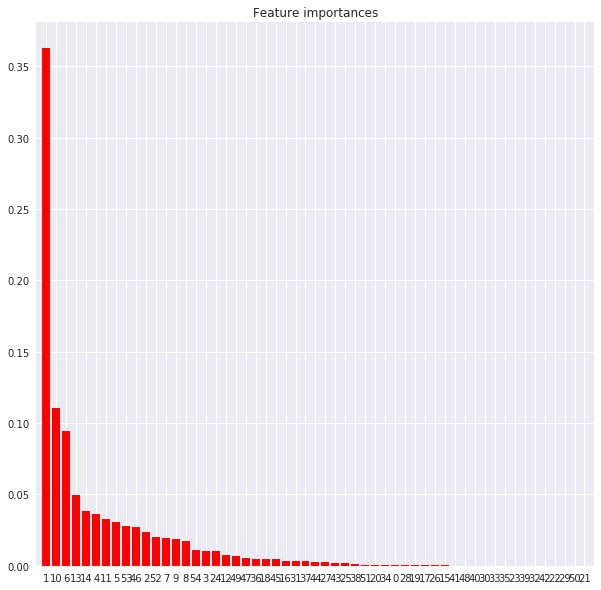

In [58]:
features_name = list(X_train1)
importances = best_model_regression.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_regression.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train1.shape[1]):
 print("%d. feature %s (%f)" % (f + 1, features_name[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
plt.title("Feature importances")


plt.bar(range(X_train1.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train1.shape[1]), indices)
plt.xlim([-1, X_train1.shape[1]])

In Random Forest the 4 most used features are : 
    
1. feature Elevation (0.347196)
2. feature Horizontal_Distance_To_Fire_Points (0.109934)
3. feature Horizontal_Distance_To_Roadways (0.093320)
4. feature Wilderness_Area4 (0.050051)


## XGBoost

Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimedperformance and efficiency gains:

In [67]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

XGBoost's hyperparameters learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
-   colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
-  n_estimators: number of trees you want to build.
-  objective: determines the loss function to be used like reg:linear for regression problems, 
-  reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
    
XGBoost also supports regularization parameters to penalize models as they become more complex and 
reduce them to simple (parsimonious) models.

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

Let's find the best parameter for XGBoost with a grid search :

In [68]:
X_train1, X_validation, y_train1, y_validation = train_test_split(X, y, test_size=0.2, random_state=123)

In [69]:
X_trainXGB, X_validXGB, y_trainXGB, y_validXGB = train_test_split(X, y, test_size=0.2, random_state=123)

In [70]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [71]:
xg_reg.fit(X_trainXGB,y_trainXGB)

predsXGB = xg_reg.predict(X_validXGB)

/home/stephane/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [72]:
rmse = np.sqrt(mean_squared_error(y_validation, predsXGB))
print("RMSE: %f" % (rmse))

RMSE: 1.308771


Cross validation

In [25]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)


[06:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[06:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[06:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[06:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[06:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[06:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[06:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:31:19] /work

[06:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[06:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[06:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[06:31:45] /work

[06:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[06:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[06:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:32:12] /work

In [26]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.954529,0.001635,1.954627,0.003713
1,1.843027,0.010642,1.843199,0.008721
2,1.736086,0.012721,1.736462,0.013031
3,1.651785,0.013162,1.652463,0.012424
4,1.582653,0.011448,1.583532,0.010584


In [27]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.997777
Name: test-rmse-mean, dtype: float64


In [28]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[06:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[06:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[06:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[06:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[06:32:22] /work

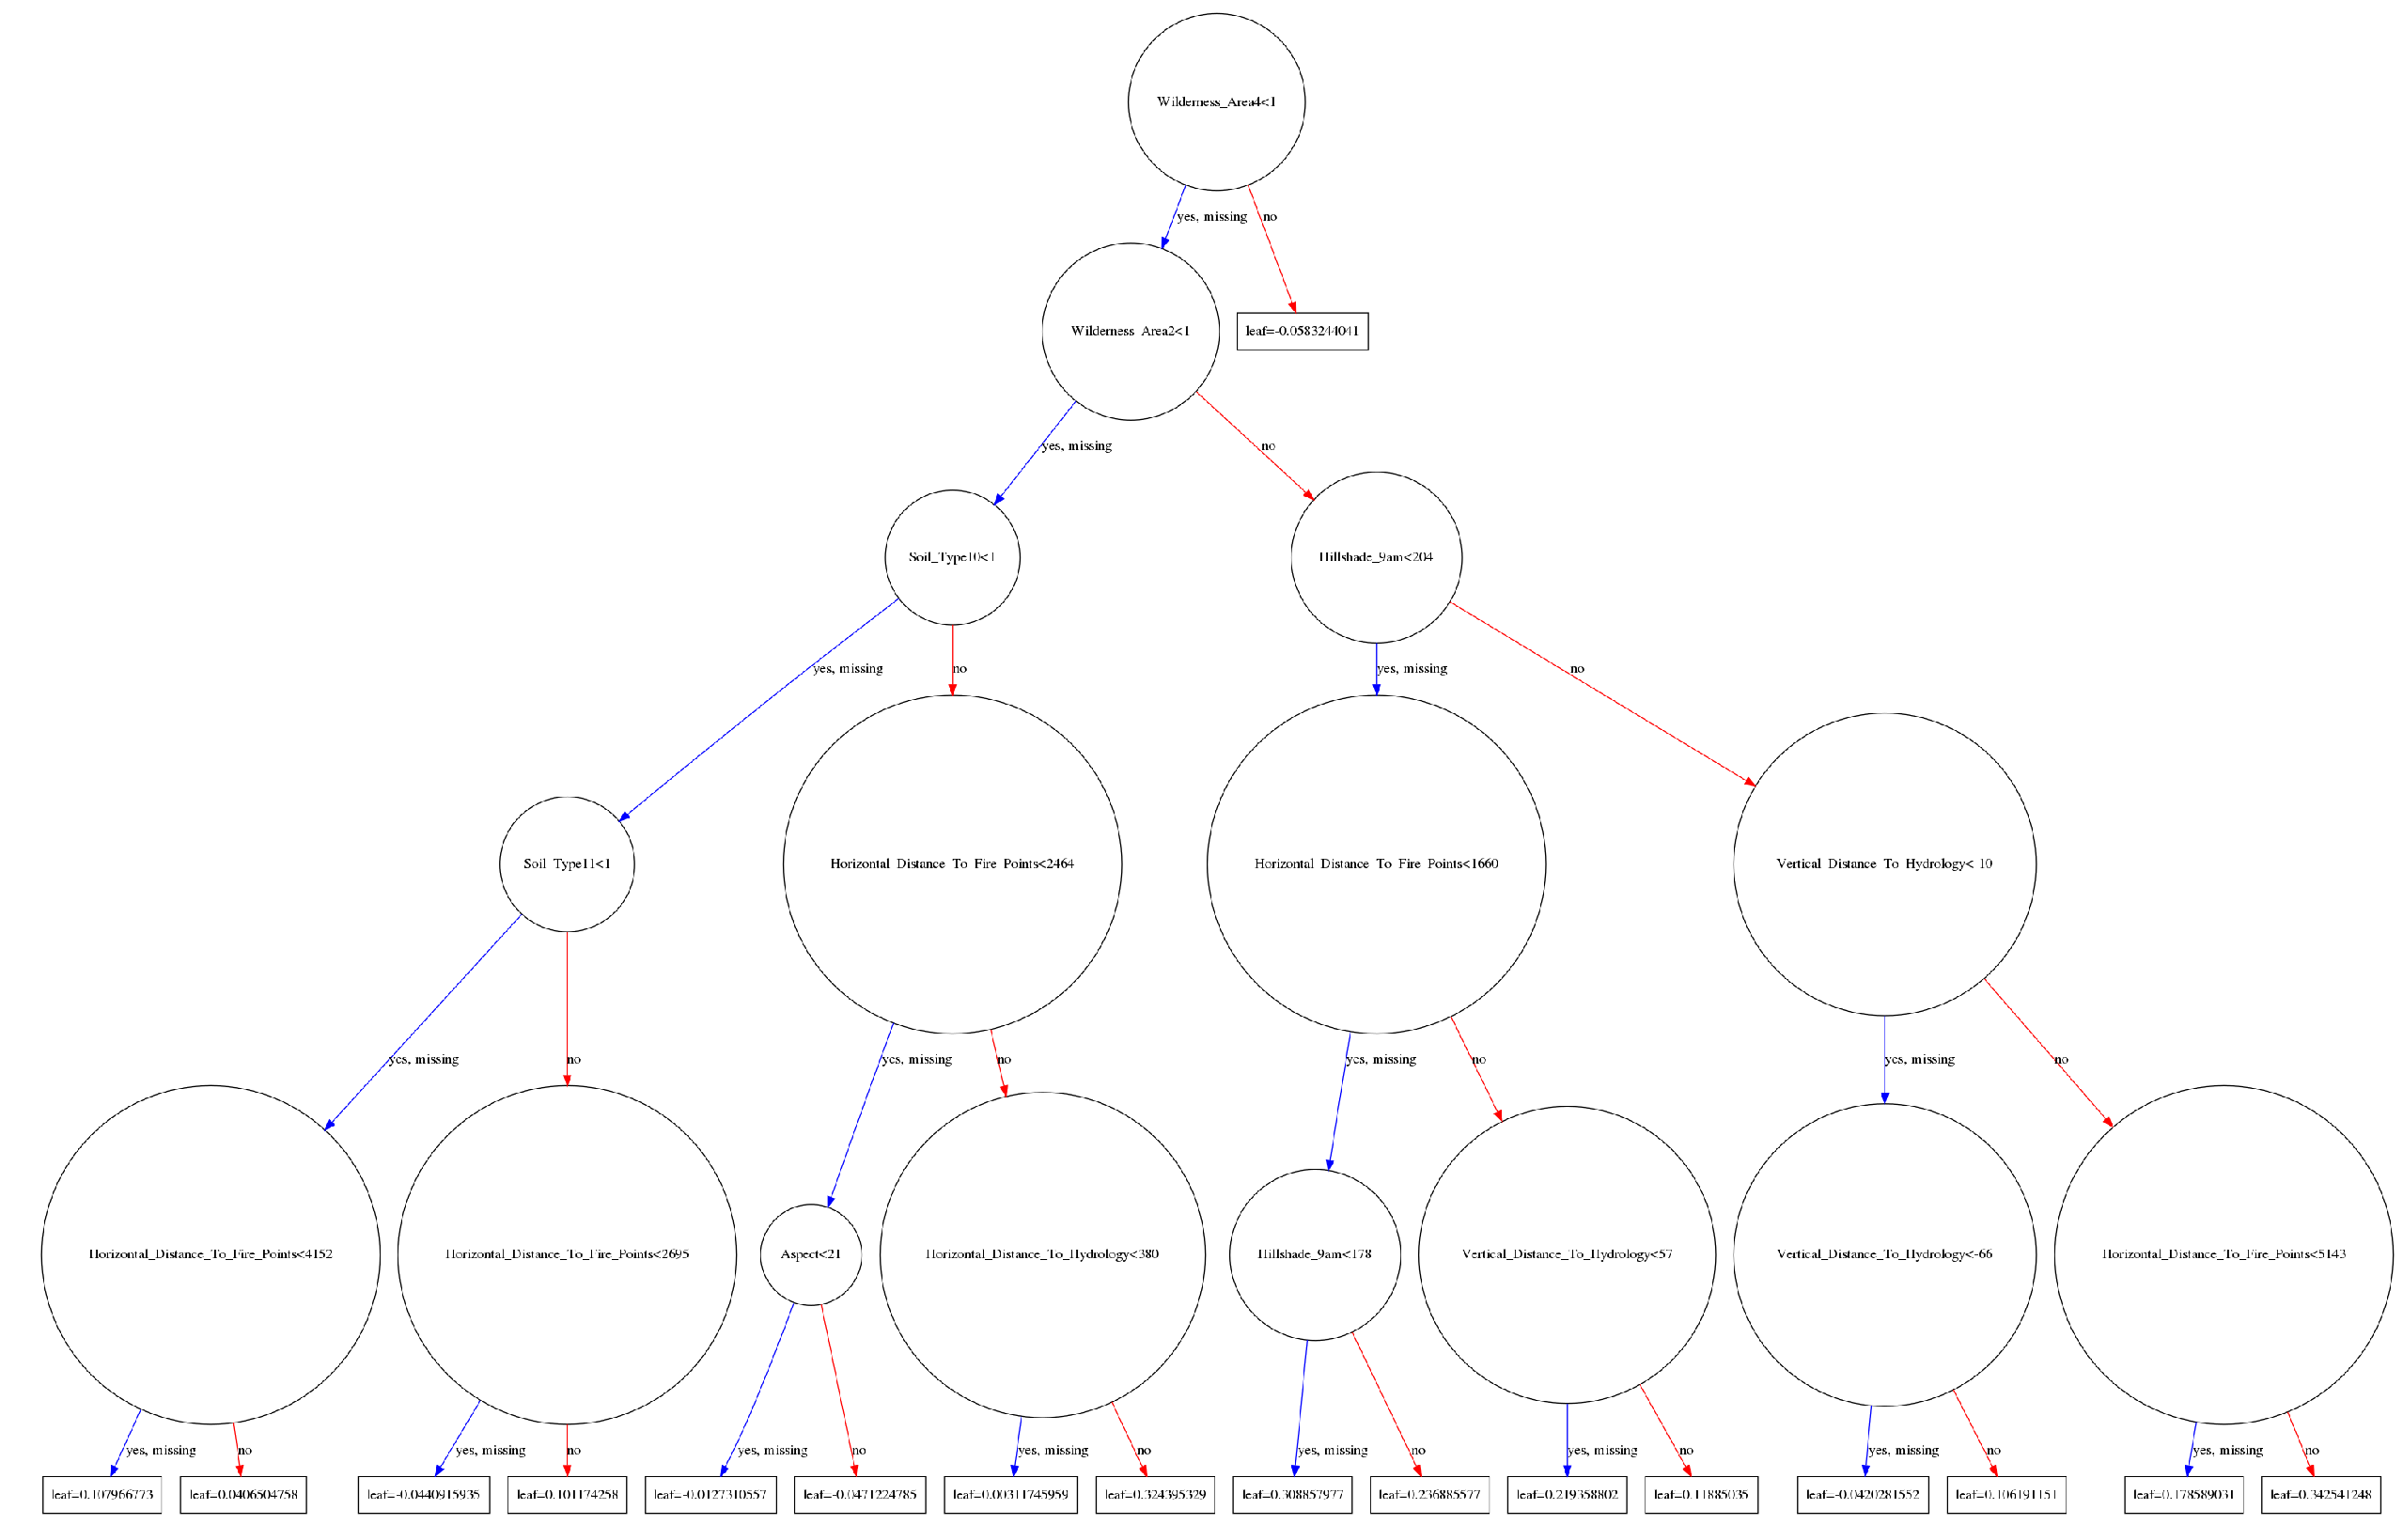

In [51]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 90]
plt.show()

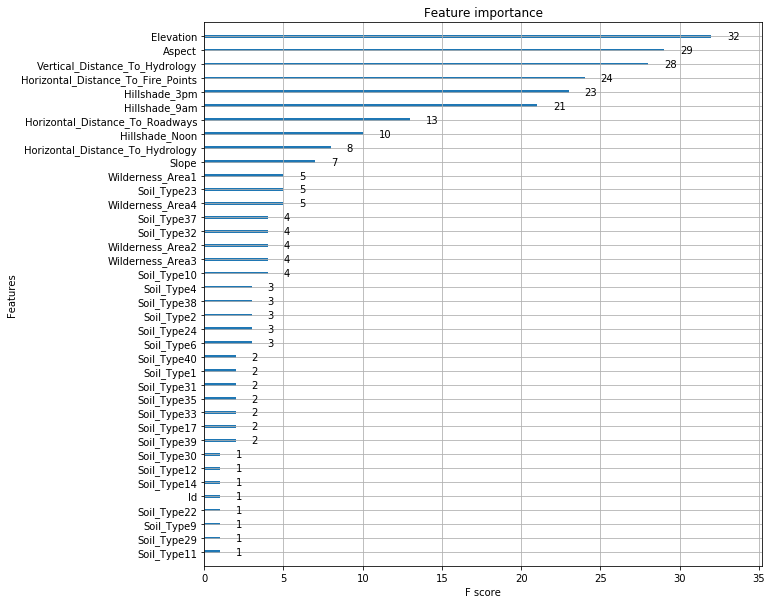

In [36]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

In [53]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),scoring='neg_mean_squared_error'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Tree


NameError: name 'get_cross_val_score' is not defined

<Figure size 720x720 with 0 Axes>

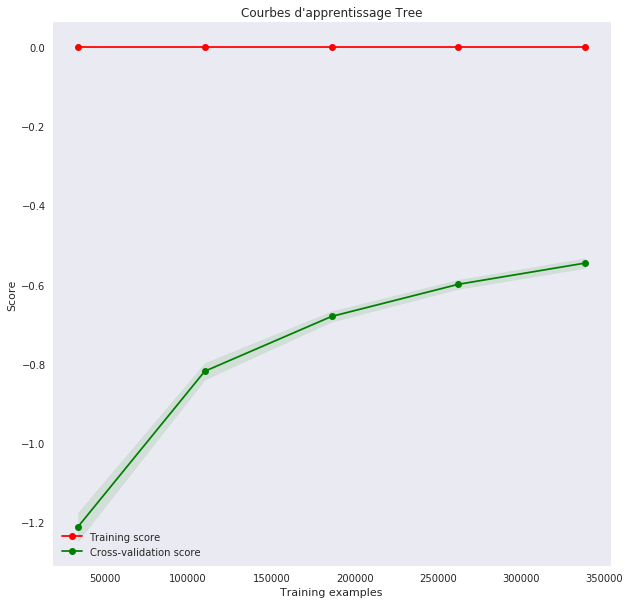

In [60]:
title = "Courbes d'apprentissage"
cv = ShuffleSplit(n_splits=15, test_size=0.2)
scoring='neg_mean_squared_error'
#algos = [Ridge(ridge_cv.alpha_),Lasso(alpha=lasso_cv.alpha_),KernelRidge(alpha=0.01, coef0=1, gamma=0.01, \
#        kernel='rbf',kernel_params=None),make_pipeline(PolynomialFeatures(3),Ridge()),DecisionTreeRegressor(),\
#        RandomForestRegressor(n_estimators=500,n_jobs=2,max_features=0.6),GradientBoostingRegressor(n_estimators=100),\
#        SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,kernel='rbf', max_iter=-1, \
#        shrinking=True, tol=0.001, verbose=False)]
algos = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=500,n_jobs=2,max_features=0.6),\
         GradientBoostingClassifier(n_estimators=100)]

algos_names=['Tree','RF','GradientBoosting']    


for (algo,algo_name) in zip(algos,algos_names):
    plt.figure()
    plot_learning_curve(algo, (title+' '+algo_name), X_train1, y_train1, cv=cv, n_jobs=2,scoring=scoring)
    print(algo_name)
    get_cross_val_score(algo,X_train1,y_train1,scoring,cv)